<a href="https://colab.research.google.com/github/syedaquib153/Rain-Fall-Prediction-Aquib/blob/main/RainFall_Prediction_Models_Aquib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
#mporting libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
#data import
path='/content/drive/MyDrive/my csv data files/rainfall_data.csv'
df =pd.read_csv(path,  error_bad_lines=False)

In [112]:
df.head()

,time,temperature_2m,precipitation_hours (h),windspeed_10m,windgusts_10m,rain_sum (mm)
0,01-01-2020,15.3,17,9.8,23.0,7.0
1,02-01-2020,15.8,11,11.4,31.3,11.7
2,03-01-2020,16.6,7,8.2,31.7,2.3
3,04-01-2020,16.1,3,11.3,21.6,0.3
4,05-01-2020,13.9,0,13.7,29.9,0.0


In [113]:
df.tail()

,time,temperature_2m,precipitation_hours (h),windspeed_10m,windgusts_10m,rain_sum (mm)
1091,27-12-2022,20.1,1,13.6,30.2,0.1
1092,28-12-2022,19.4,0,9.6,20.9,0.0
1093,29-12-2022,18.5,0,9.0,17.3,0.0
1094,30-12-2022,20.2,0,10.1,25.2,0.0
1095,31-12-2022,19.3,0,10.2,20.5,0.0


In [114]:
df.isnull().sum()

time                       0
temperature_2m             0
precipitation_hours (h)    0
windspeed_10m              0
windgusts_10m              0
rain_sum (mm)              0
dtype: int64

Inference: There is no null values present

In [115]:
df.columns

Index(['time', 'temperature_2m', 'precipitation_hours (h)', 'windspeed_10m',
       'windgusts_10m', 'rain_sum (mm)'],
      dtype='object')

In [116]:
df.describe()

,temperature_2m,precipitation_hours (h),windspeed_10m,windgusts_10m,rain_sum (mm)
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,23.895073,4.389599,13.077737,29.346898,3.841058
std,4.452798,6.832145,4.361309,8.660930,11.029481
min,12.200000,0.000000,4.800000,12.600000,0.000000
25%,20.600000,0.000000,9.700000,23.000000,0.000000
50%,23.900000,0.000000,12.300000,27.900000,0.000000
75%,26.100000,7.000000,15.600000,34.200000,3.000000
max,34.900000,24.000000,30.400000,66.200000,241.400000


**Data cleaning and Visualization**

In [117]:

#defining a datainfoAll
def datainfoAll(df):
   print(f"Dataset Shape: {df.shape}")
   print("-"*125)
   summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
   summary = summary.reset_index()
   summary['Name'] = summary['index']
   summary = summary[['Name','dtypes']]
   summary['Missing'] = df.isnull().sum().values    
   summary['Uniques'] = df.nunique().values
   summary['First Value'] = df.iloc[0].values
   summary['Second Value'] = df.iloc[1].values
   return summary

In [118]:
datainfoAll(df)

Dataset Shape: (1096, 6)
-----------------------------------------------------------------------------------------------------------------------------


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,time,object,0,1096,01-01-2020,02-01-2020
1,temperature_2m,float64,0,200,15.3,15.8
2,precipitation_hours (h),int64,0,25,17,11
3,windspeed_10m,float64,0,189,9.8,11.4
4,windgusts_10m,float64,0,119,23.0,31.3
5,rain_sum (mm),float64,0,186,7.0,11.7


Nan Values are more

In [119]:
Dublicates=df[df.duplicated()]
print(f'The Dublicate Values in Dataframe: ')
Dublicates

The Dublicate Values in Dataframe: 


,time,temperature_2m,precipitation_hours (h),windspeed_10m,windgusts_10m,rain_sum (mm)


No Dublicates where found

In [120]:
#Dropping all the NaN Values
df.dropna()

,time,temperature_2m,precipitation_hours (h),windspeed_10m,windgusts_10m,rain_sum (mm)
0,01-01-2020,15.3,17,9.8,23.0,7.0
1,02-01-2020,15.8,11,11.4,31.3,11.7
2,03-01-2020,16.6,7,8.2,31.7,2.3
3,04-01-2020,16.1,3,11.3,21.6,0.3
4,05-01-2020,13.9,0,13.7,29.9,0.0
...,...,...,...,...,...,...
1091,27-12-2022,20.1,1,13.6,30.2,0.1
1092,28-12-2022,19.4,0,9.6,20.9,0.0
1093,29-12-2022,18.5,0,9.0,17.3,0.0
1094,30-12-2022,20.2,0,10.1,25.2,0.0


In [121]:
#Dropping All NaN Values in date_added_columns
print(f"Before dropping the NaN values from date_added the shape was {df.shape}")
df.dropna(inplace = True)
print(f"After dropping the NaN values from date_added now the shape is {df.shape}")

Before dropping the NaN values from date_added the shape was (1096, 6)
After dropping the NaN values from date_added now the shape is (1096, 6)


In [122]:
df.nunique()

time                       1096
temperature_2m              200
precipitation_hours (h)      25
windspeed_10m               189
windgusts_10m               119
rain_sum (mm)               186
dtype: int64

In [123]:
df.columns

Index(['time', 'temperature_2m', 'precipitation_hours (h)', 'windspeed_10m',
       'windgusts_10m', 'rain_sum (mm)'],
      dtype='object')

In [124]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]

In [125]:
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))

Numerical Features Count 5
Discrete feature Count 0
Continuous feature Count 5


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


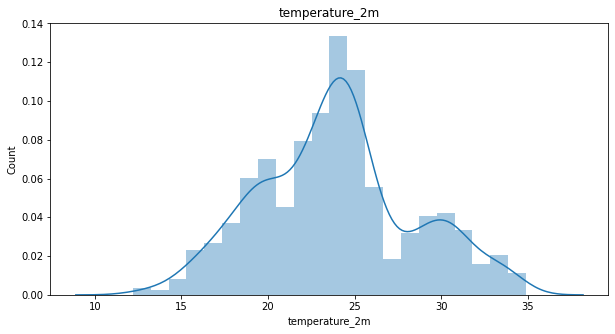

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


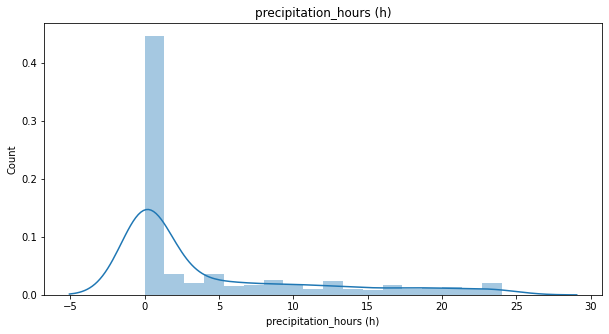

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


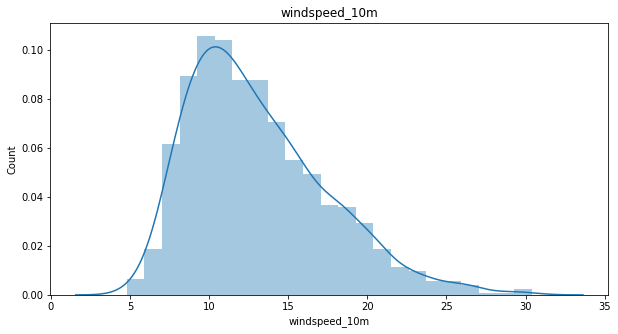

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


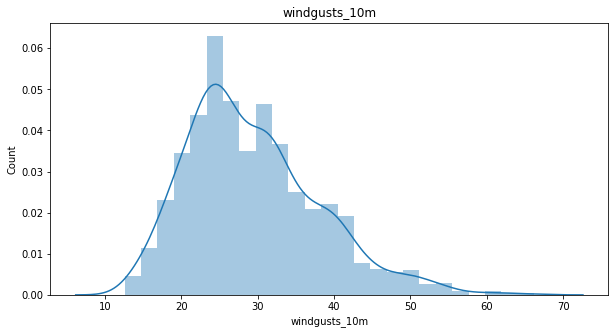

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


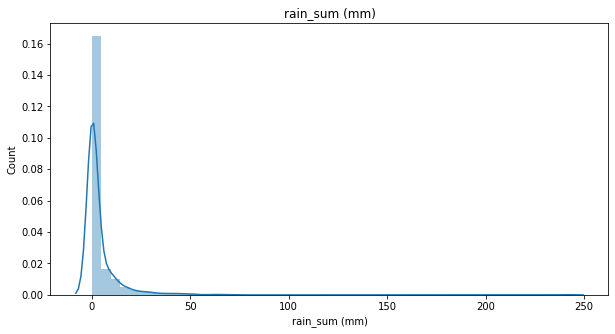

<Figure size 1080x1080 with 0 Axes>

In [126]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

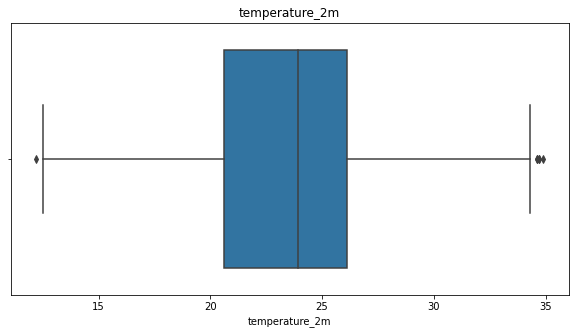

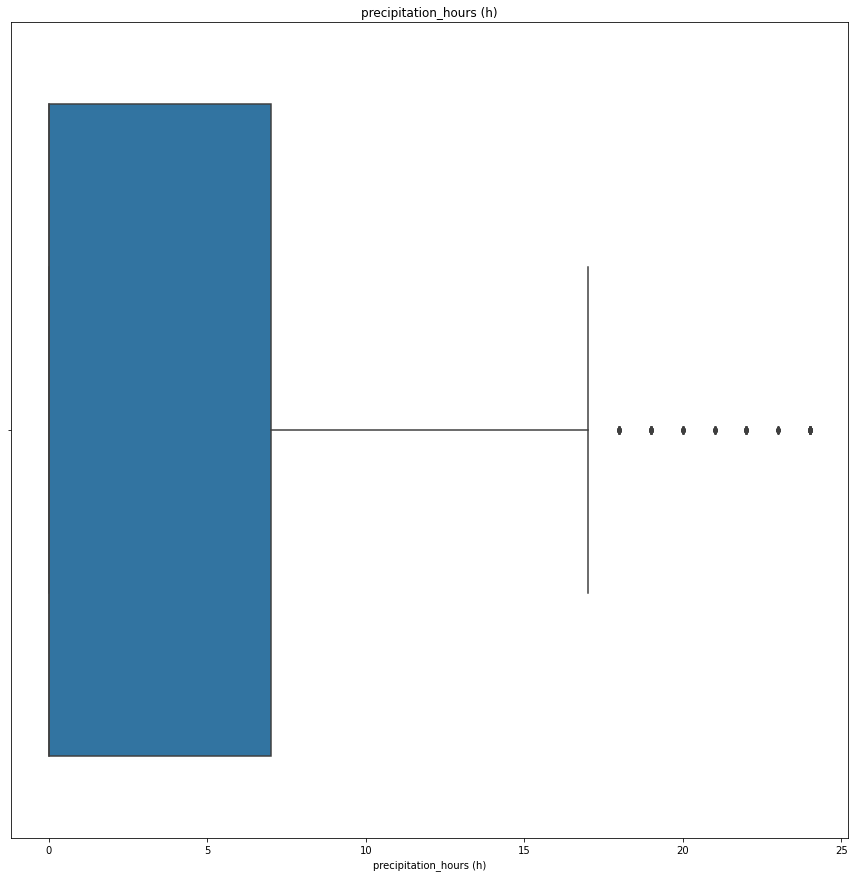

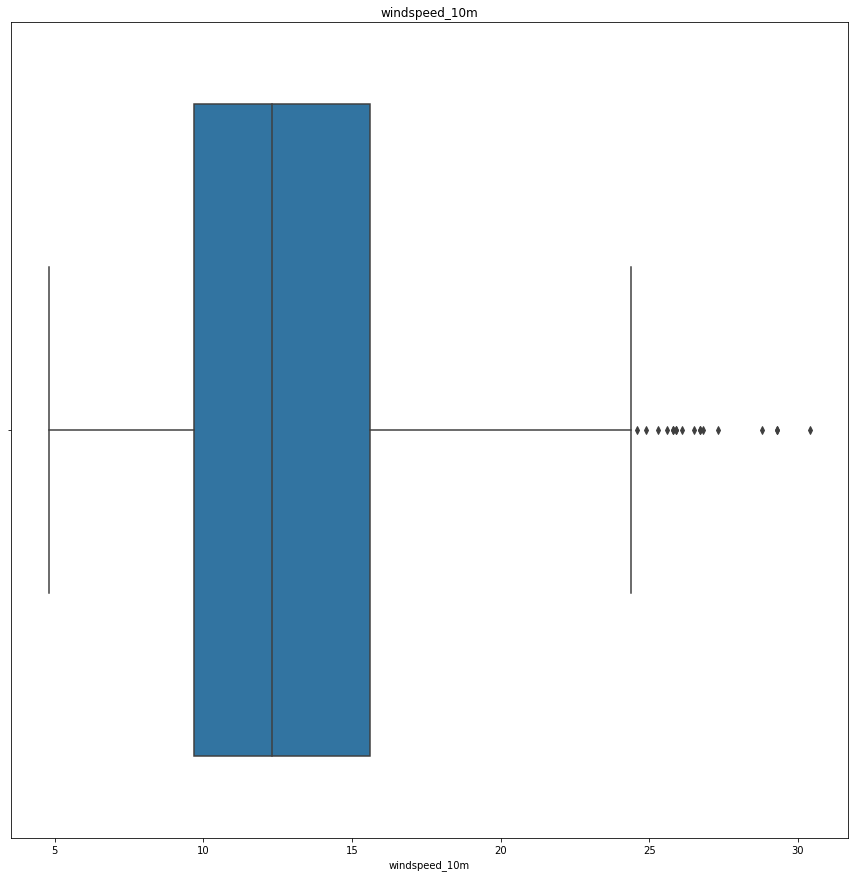

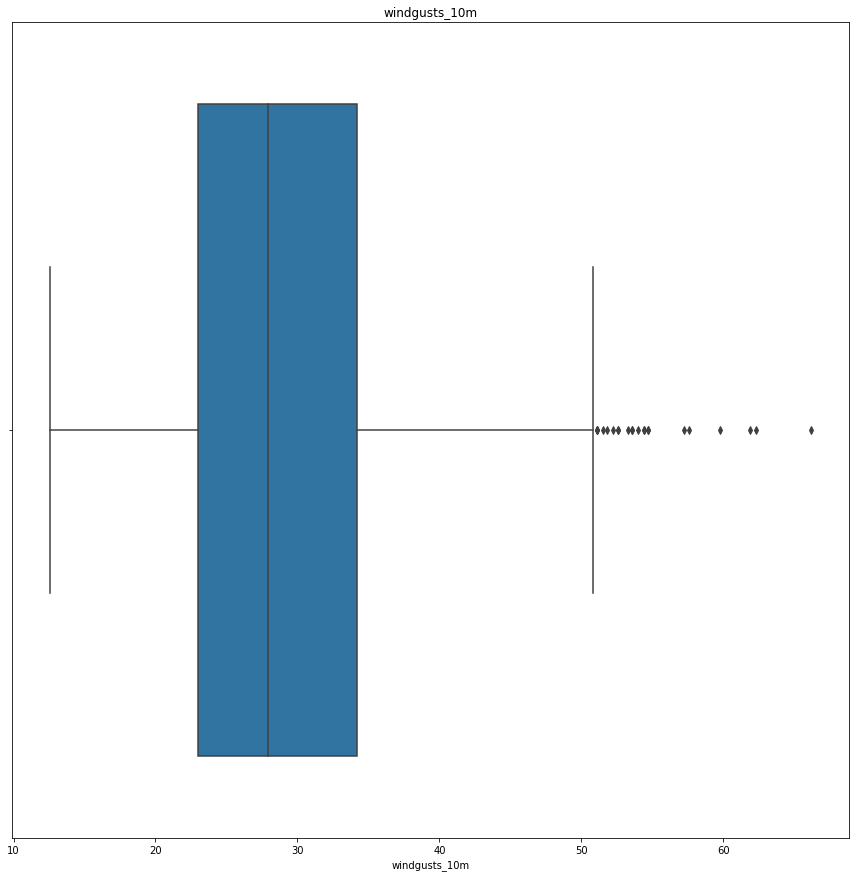

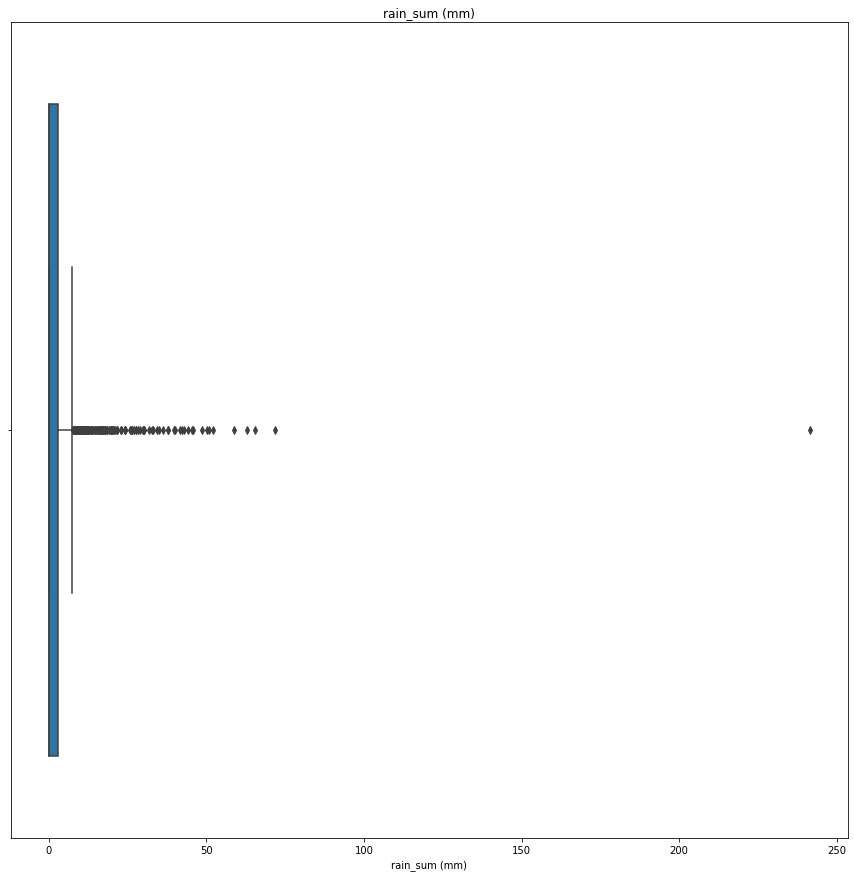

<Figure size 1080x1080 with 0 Axes>

In [127]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

Since outliers are found we need to replace it with median

In [128]:
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())

In [129]:
df.isnull().sum()*100/len(df)

time                       0.0
temperature_2m             0.0
precipitation_hours (h)    0.0
windspeed_10m              0.0
windgusts_10m              0.0
rain_sum (mm)              0.0
dtype: float64

In [130]:
df.columns

Index(['time', 'temperature_2m', 'precipitation_hours (h)', 'windspeed_10m',
       'windgusts_10m', 'rain_sum (mm)'],
      dtype='object')

In [135]:
# extracting day,month, day of week and weekdays/weekend from date column
df['time']=pd.to_datetime(df['time'])
df['month'] = df['time'].apply(lambda x : x.month)
df['week_number'] = df['time'].dt.strftime("%U")

In [136]:
df = df.drop(columns = ['time'])

In [137]:
df.columns

Index(['temperature_2m', 'precipitation_hours (h)', 'windspeed_10m',
       'windgusts_10m', 'rain_sum (mm)', 'month', 'week_number'],
      dtype='object')

**Modelling for Regression Models**

**Linear Regression**

In [133]:
final_features = ['temperature_2m', 'precipitation_hours (h)','windgusts_10m', 'month', 'week_number']

In [139]:
#transformation of data 
from scipy.stats import zscore

X = df[final_features]


In [141]:
#Target variable
y = df['rain_sum (mm)']

In [142]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [143]:
#Implementing Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.intercept_
regressor.coef_
y_pred_train = regressor.predict(X_train)
y_pred = regressor.predict(X_test)


In [144]:
# Intercept Values
regressor.intercept_

-0.7456726673227414

In [145]:
# Coefficent Values
regressor.coef_

array([-0.10690673,  1.08053   ,  0.09899529, -1.27790264,  0.30366297])

In [ ]:
# Mean Square Error 
mean_squared_error(y_test, y_pred)

In [147]:
#R2 Score values for train and test split
r2_score(y_train, y_pred_train)

0.4287176641823591

In [148]:
r2_score(y_test, y_pred)

0.5981434733785336

In [149]:
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.5887543021957891


Inference: R2 for train and test split prediction is 0.59 we conclude that a model performance is low.

**Implementing Lasso Regressor**

In [150]:
#import Lasso regressor and grid search cv
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso_ = Lasso()

In [151]:

alphas = [0.01,0.025,0.5,0.75,1]
for alpha in alphas:
  lasso  = Lasso(alpha=alpha , max_iter= 3000)
  lasso.fit(X_train, y_train)
  print('alpha: ',alpha)
  print('test Score: ',lasso.score(X_test, y_test))
  print('train Score: ',lasso.score(X_train, y_train))

alpha:  0.01
test Score:  0.5990740142310417
train Score:  0.4287045458084341
alpha:  0.025
test Score:  0.6003584512765568
train Score:  0.42863570660861905
alpha:  0.5
test Score:  0.6093036740460827
train Score:  0.4274776117673844
alpha:  0.75
test Score:  0.6120845165862369
train Score:  0.42723583555009303
alpha:  1
test Score:  0.6146947807799535
train Score:  0.426897375093089


In [152]:
lasso  = Lasso(alpha=0.01 , max_iter= 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, max_iter=3000)

In [153]:
y_test_pred = lasso.predict(X_test)

print('MSE is {}'.format(mean_squared_error(y_test, y_test_pred)))
print('RMSE is {}'.format(math.sqrt(mean_squared_error(y_test, y_test_pred))))
print('MAE is {}'.format(mean_absolute_error(y_test, y_test_pred)))

MSE is 25.291376718109635
RMSE is 5.029053262604169
MAE is 2.825730304618907


In [154]:
r2 = r2_score(y_test, y_test_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.5990740142310417
Adjusted R2 :  0.5897065846570005


Inference: R2 for train and test split prediction is 0.59 after applying Lasso Regression we conclude that a model performance is low.

**XGBOOST REGRESSION**

In [183]:
# create an xgboost regression model
#final_features = ['temperature_2m', 'precipitation_hours (h)','windgusts_10m', 'month', 'week_number']
final_features_1 = ['temperature_2m', 'precipitation_hours (h)','windgusts_10m','month']

In [184]:
X = df[final_features_1]
#Target variable
y = df['rain_sum (mm)']

In [185]:
#Splitting the data into Training Data and Testing Data


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(1096, 4) (986, 4) (110, 4)


In [186]:
#MACHINE LEARNING MODEL

#By using XGBOOST REGRESSOR

from xgboost import XGBRegressor
regressor= XGBRegressor()
     

regressor.fit(X_train, y_train)

[11:17:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [188]:
#Evaluation
from sklearn import metrics

# prediction on training data
train_data_prediction=regressor.predict(X_train)
     
#*The R2 score is a very important metric that is used to evaluate the performance of a regression-based machine learning model.*


# R Squared Value
r2_train=metrics.r2_score(y_train,train_data_prediction)
     

print('The R Squared Value = ',r2_train)

The R Squared Value =  0.8951684220847499


Inference: R2 for train and test split prediction is 0.89 .we conclude that a model performance is very good.

**Conclusion**
We used diffent type of regression algorithms to train our model like, Linear Regression, Regularized linear regression ( Lasso),XGboost regresssor   and also found the important features for training the model. Out of them XGboost  gave the best result which is 89%